In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")

In [5]:
invalid_trades = pd.read_parquet('../data/invalid_trades.parquet')

In [10]:
invalid_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   trader_address          1316 non-null   object             
 1   trade_id                1316 non-null   object             
 2   creation_timestamp      1316 non-null   datetime64[ns, UTC]
 3   title                   1316 non-null   object             
 4   market_status           1316 non-null   object             
 5   collateral_amount       1316 non-null   float64            
 6   outcome_index           1316 non-null   object             
 7   trade_fee_amount        1316 non-null   float64            
 8   outcomes_tokens_traded  1316 non-null   float64            
 9   current_answer          1316 non-null   int64              
 10  is_invalid              1316 non-null   bool               
 11  winning_trade           1316 non-null   boo

In [6]:
invalid_trades['creation_timestamp'] = pd.to_datetime(invalid_trades['creation_timestamp'])
invalid_trades['creation_date'] = invalid_trades['creation_timestamp'].dt.date

# Number of invalid trades

Text(0.5, 1.0, 'Distribution of daily invalid trades over time')

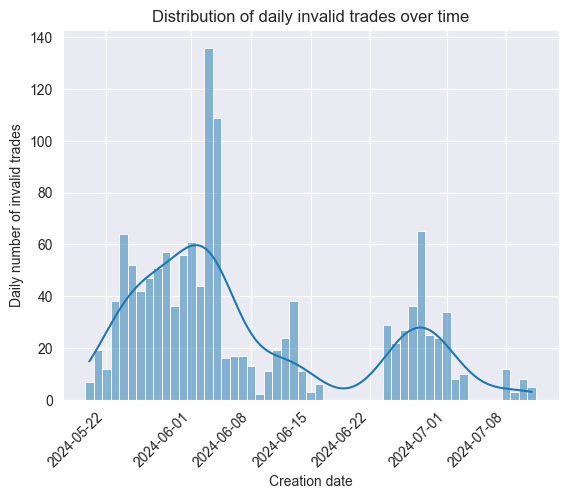

In [14]:
sns.histplot(data=invalid_trades, x="creation_date", kde=True)
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Creation date")
plt.ylabel("Daily number of invalid trades")
plt.title("Distribution of daily invalid trades over time")

In [7]:
import plotly.express as px

fig = px.histogram(invalid_trades, x="creation_date")
fig.show()

# Number of invalid markets

In [15]:
invalid_trades.iloc[0].title

'Will there be another attack on Tel Aviv by Hamas by 5 June 2024?'

The title is the market. Let's see the total number of markets on the file.

In [16]:
invalid_markets = list(invalid_trades.title.unique())
len(invalid_markets)

21

In [10]:
daily_invalid_markets = invalid_trades.groupby("creation_date").agg(trades_count=("title", "count"), nr_markets=("title", "nunique")).reset_index()
daily_invalid_markets.head()

creation_date  trades_count  nr_markets
0    2024-05-20             7           1
1    2024-05-21            19           2
2    2024-05-22            12           3
3    2024-05-23            38           3
4    2024-05-24            64           3

In [11]:
daily_invalid_markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   creation_date  42 non-null     object
 1   trades_count   42 non-null     int64 
 2   nr_markets     42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [12]:
daily_invalid_markets.iloc[0].creation_date

datetime.date(2024, 5, 20)

In [13]:

daily_invalid_markets["creation_date"] = daily_invalid_markets["creation_date"].astype(str)
daily_invalid_markets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   creation_date  42 non-null     object
 1   trades_count   42 non-null     int64 
 2   nr_markets     42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [14]:
daily_invalid_markets.iloc[0].creation_date

'2024-05-20'

Text(0.5, 1.0, 'Evolution of daily invalid markets over time')

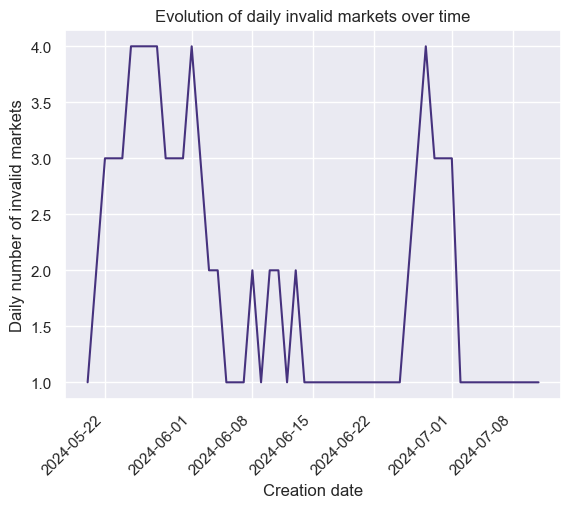

In [27]:
sns.set_theme(palette="viridis")
sns.lineplot(data=daily_invalid_markets, x="creation_date", y="nr_markets")
plt.xticks(rotation=45, ha='right')  
plt.xlabel("Creation date")
plt.ylabel("Daily number of invalid markets")
plt.title("Evolution of daily invalid markets over time")

# Ratio of invalid trades per market

In [29]:
# give an id to each market
# assign a unique integer ID to each unique value
cat = invalid_trades['title']
codes, uniques = pd.factorize(cat)

# add the IDs as a new column to the original dataframe
invalid_trades['title_id'] = codes

print(uniques)

Index(['Will there be another attack on Tel Aviv by Hamas by 5 June 2024?',
       'Will the World Court accept another request from Mexico for measures against Ecuador by 29 May 2024?',
       'Will Android's new feature to detect if your phone has been snatched be officially launched by 24 May 2024?',
       'Will Elon Musk's disputed $58 billion compensation package be approved by institutional investors by 8 June 2024?',
       'Will Iga Swiatek win the French Open 2024?',
       'Will the southern New Jersey forest fire be completely extinguished by 12 July 2024?',
       'Will Cristiano Ronaldo score a goal in the Euro 2024 on or by 30 May 2024?',
       'Will Phil Foden score a goal in the Euro 2024 finals on 4 July 2024?',
       'Will Train release another song after 'Long Yellow Dress' by 3 June 2024?',
       'Will the verdict of Julian Assange's extradition fight be announced by 25 May 2024?',
       'Will the Sonos Ace headphones surpass the sales of Apple’s AirPods Max an

In [30]:
invalid_trades.head()

trader_address  \
0  0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736   
1  0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736   
2  0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736   
3  0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736   
4  0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736   

                                            trade_id  \
0  0x0941312d4129ae67d5dd661db7b9659411a949b80x03...   
1  0x0941312d4129ae67d5dd661db7b9659411a949b80x03...   
2  0x0941312d4129ae67d5dd661db7b9659411a949b80x03...   
3  0x09c12830e837b966167a853659135474257df59b0x03...   
4  0x09c12830e837b966167a853659135474257df59b0x03...   

         creation_timestamp  \
0 2024-06-02 14:27:50+00:00   
1 2024-06-03 16:29:00+00:00   
2 2024-06-04 18:25:55+00:00   
3 2024-05-28 14:25:40+00:00   
4 2024-05-29 16:26:40+00:00   

                                               title market_status  \
0  Will there be another attack on Tel Aviv by Ha...        CLOSED   
1  Will there be another attack on Tel Aviv by Ha...        CLOSED   
2  Will there be another attack on Tel Aviv by Ha...        CLOSED   
3  Will the World Court accept another request fr...        CLOSED   
4  Will the World Court accept another request fr...        CLOSED   

   collateral_amount outcome_index  trade_fee_amount  outcomes_tokens_traded  \
0           1.248755             1          0.024975                2.371756   
1           0.749347             0          0.014987                1.339527   
2           0.749593             0          0.014992                1.369272   
3           0.741739             1          0.014835                1.208649   
4           0.689813             1          0.013796                0.914552   

   current_answer  ...  winning_trade  earnings  redeemed  redeemed_amount  \
0              -1  ...          False  1.248755      True         1.248755   
1              -1  ...          False  0.749347      True         0.749347   
2              -1  ...          False  0.749593      True         0.749593   
3              -1  ...          False  0.741739      True         0.741739   
4              -1  ...          False  0.689813      True         0.689813   

   num_mech_calls  mech_fee_amount  net_earnings       roi  creation_date  \
0               0              0.0     -0.024975 -0.019608     2024-06-02   
1               0              0.0     -0.014987 -0.019608     2024-06-03   
2               0              0.0     -0.014992 -0.019608     2024-06-04   
3               0              0.0     -0.014835 -0.019608     2024-05-28   
4               0              0.0     -0.013796 -0.019608     2024-05-29   

  title_id  
0        0  
1        0  
2        0  
3        1  
4        1  

[5 rows x 21 columns]

In [32]:
invalid_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   trader_address          1316 non-null   object             
 1   trade_id                1316 non-null   object             
 2   creation_timestamp      1316 non-null   datetime64[ns, UTC]
 3   title                   1316 non-null   object             
 4   market_status           1316 non-null   object             
 5   collateral_amount       1316 non-null   float64            
 6   outcome_index           1316 non-null   object             
 7   trade_fee_amount        1316 non-null   float64            
 8   outcomes_tokens_traded  1316 non-null   float64            
 9   current_answer          1316 non-null   int64              
 10  is_invalid              1316 non-null   bool               
 11  winning_trade           1316 non-null   boo

Text(0.5, 1.0, 'Distribution of invalid trades over markets')

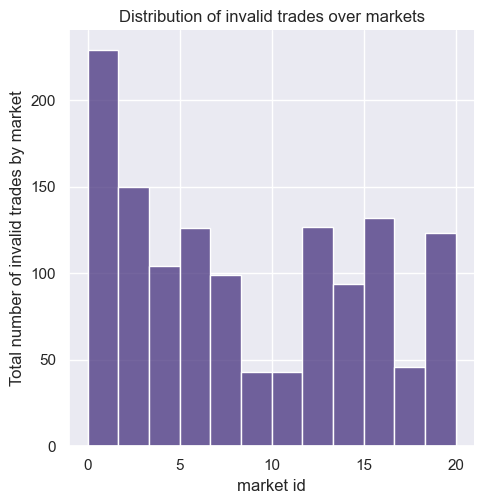

In [35]:
sns.displot(invalid_trades, x="title_id")
plt.xlabel("market id")
plt.ylabel("Total number of invalid trades by market")
plt.title("Distribution of invalid trades per market")

In [45]:
top_invalid_markets = invalid_trades.title.value_counts().reset_index()
top_invalid_markets.rename(columns={"count": "nr_invalid_trades"}, inplace=True)
top_invalid_markets


title  nr_invalid_trades
0   Will there be another attack on Tel Aviv by Ha...                159
1   Will Elon Musk's disputed $58 billion compensa...                127
2          Will Iga Swiatek win the French Open 2024?                104
3   Will Cristiano Ronaldo score a goal in the Eur...                 98
4   Will the iPad Pro (2024) and iPad Air 6 have m...                 94
5   Will the federal bill criminalizing deepfake n...                 93
6   Will a significant rise in sea levels occur du...                 81
7   Will Train release another song after 'Long Ye...                 72
8   Will the World Court accept another request fr...                 70
9          Will Australia win the T20 World Cup 2024?                 67
10  Will the LA Lakers win their first game under ...                 56
11  Will Valerie Bertinelli return to social media...                 51
12  Will the verdict of Julian Assange's extraditi...                 43
13  Will Apple successfully overtake the leaders i...                 34
14  Will the southern New Jersey forest fire be co...                 28
15  Will Phil Foden score a goal in the Euro 2024 ...                 27
16  Will the Sonos Ace headphones surpass the sale...                 24
17  Will the crisis formed by the Egyptian authori...                 23
18  Will Russian teenager Mirra Andreeva win the F...                 23
19  Will Android's new feature to detect if your p...                 23
20  Will a peace agreement be reached between Russ...                 19

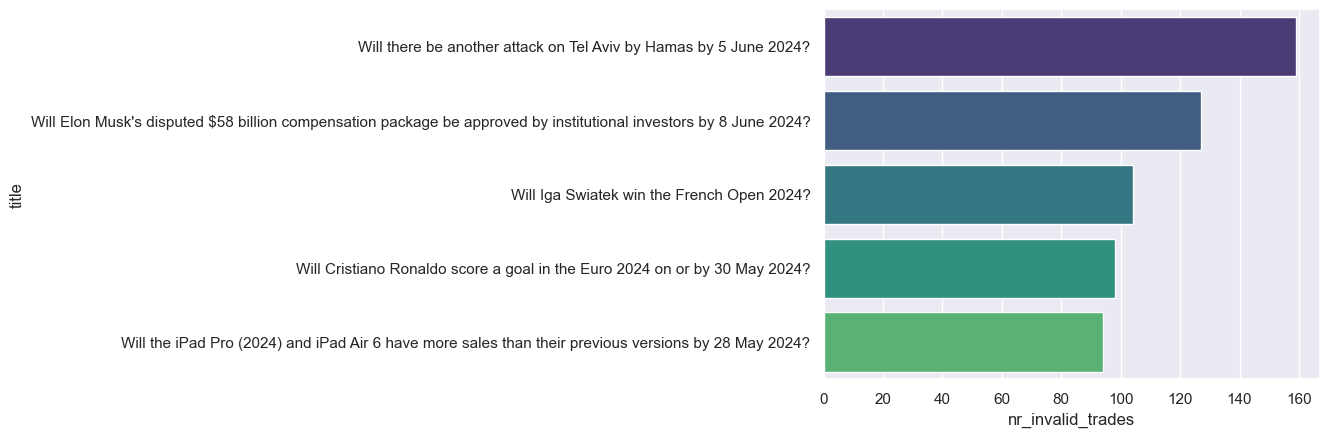

In [47]:
plot = sns.barplot(
    top_invalid_markets.head(),
    x="nr_invalid_trades",
    y="title",
    hue="title",
    dodge=False,
)

In [24]:
daily_data = daily_invalid_markets.melt(id_vars=["creation_date"], var_name="metric", value_name="count")
daily_data.head()

creation_date        metric  count
0    2024-05-20  trades_count      7
1    2024-05-21  trades_count     19
2    2024-05-22  trades_count     12
3    2024-05-23  trades_count     38
4    2024-05-24  trades_count     64